In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\Rohit Mhatre\\Downloads\\1dec24.csv")
data.head(2)

,SYMBOL,Sector,Industry,% Change,Close Price,%pct,ALPHA NEW L/N,ALPHA NEW L/S,% Change.1,Close Price.1,...,ALPHA NEW S/N,ALPHA NEW S/S,ltp change,NSE CODE,52 week High,%52 week High,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NSE:GRINDWELL,ABRASIVES,ABRASIVES,2588.55,2108.0,-18.564447,-21.85,-18.80,2390.35,2108.0,...,-21.16,-17.15,NaN,"NSE:GRINDWELL,",2960.00,40.417457,NaN,NaN,NaN,NaN
1,NSE:CARBORUNIV,ABRASIVES,ABRASIVES,1718.80,1457.8,-15.185013,-18.47,-15.42,1510.20,1457.8,...,-11.36,-7.35,0.0,"NSE:CARBORUNIV,",1841.15,26.296474,NaN,NaN,NaN,NaN


In [3]:
df = data[['SYMBOL','Sector','ALPHA NEW L/N','ALPHA NEW L/S','NSE CODE']].copy()
df.dropna(axis=0,inplace=True)

In [4]:
duplicate = df['SYMBOL'].duplicated()
duplicate.sum()

33

In [5]:
df = df.drop_duplicates(subset=['SYMBOL'])

In [6]:
df['SYMBOL'].duplicated().sum()

0

In [7]:
df.head()

,SYMBOL,Sector,ALPHA NEW L/N,ALPHA NEW L/S,NSE CODE
0,NSE:GRINDWELL,ABRASIVES,-21.85,-18.80,"NSE:GRINDWELL,"
1,NSE:CARBORUNIV,ABRASIVES,-18.47,-15.42,"NSE:CARBORUNIV,"
2,NSE:WENDT,ABRASIVES,-2.68,0.36,"NSE:WENDT,"
3,NSE:BBTC,AGRICULTURE,2.13,5.18,"NSE:BBTC,"
4,NSE:BSHSL,AGRICULTURE,-19.19,-16.15,"NSE:BSHSL,"


In [8]:
group_df = df.groupby('Sector')['ALPHA NEW L/N'].mean()

top_n_sectors = group_df.sort_values(ascending=False)
b = pd.DataFrame(top_n_sectors)
b['rank'] = np.arange(1,len(b)+1)
b

,ALPHA NEW L/N,rank
Sector,,
IT - EducationInformation TechnologyMid Cap,77.620000,1
Electric EquipmentElectric EquipmentCAPITAL GOODSMid Cap,42.837000,2
Diamond & Jewellery,37.500000,3
Ratings,28.843333,4
Medical Equipment/Supplies/AccessoriesHealthcare,24.040000,5
...,...,...
Renewable energy,-24.290000,147
IT - NetworkingInformation TechnologySmall Cap,-24.715000,148
Railways Wagons/AUTOMOBILE & ANCILLARIES,-26.630000,149


In [9]:
result = []
for sector,avg_alpha in top_n_sectors.items():
    stocks_above_avg = df[(df['Sector'] == sector) & (df['ALPHA NEW L/N'] >= avg_alpha)]
    result.append(stocks_above_avg)

In [10]:
stock = pd.concat(result,ignore_index=True)
stock.head(60)

,SYMBOL,Sector,ALPHA NEW L/N,ALPHA NEW L/S,NSE CODE
0,NSE:NIITLTD,IT - EducationInformation TechnologyMid Cap,77.62,80.66,"NSE:NIITLTD,"
1,NSE:TARIL,Electric EquipmentElectric EquipmentCAPITAL GO...,460.45,463.50,"NSE:TARIL,"
2,NSE:GOLDIAM,Diamond & Jewellery,65.53,68.58,"NSE:GOLDIAM,"
3,NSE:PCJEWELLER,Diamond & Jewellery,71.06,74.11,"NSE:PCJEWELLER,"
4,NSE:RGL,Diamond & Jewellery,73.44,76.48,"NSE:RGL,"
5,NSE:TBZ,Diamond & Jewellery,54.16,57.20,"NSE:TBZ,"
6,NSE:RADHIKAJWE,Diamond & Jewellery,37.81,40.86,"NSE:RADHIKAJWE,"
7,NSE:SKYGOLD,Diamond & Jewellery,87.94,90.99,"NSE:SKYGOLD,"
8,NSE:RBZJEWEL,Diamond & Jewellery,37.52,40.56,"NSE:RBZJEWEL,"
9,NSE:MOTISONS,Diamond & Jewellery,78.47,81.52,"NSE:MOTISONS,"


In [11]:
for sym in stock['NSE CODE']:
    print(sym)

NSE:NIITLTD,
NSE:TARIL,
NSE:GOLDIAM,
NSE:PCJEWELLER,
NSE:RGL,
NSE:TBZ,
NSE:RADHIKAJWE,
NSE:SKYGOLD,
NSE:RBZJEWEL,
NSE:MOTISONS,
NSE:CARERATING,
NSE:POLYMED,
NSE:PAYTM,
NSE:POLICYBZR,
NSE:ZAGGLE,
NSE:SEJALLTD,
NSE:HINDNATGLS,
NSE:INDHOTEL,
NSE:BSE,
NSE:KFINTECH,
NSE:PRUDENT,
NSE:AMBER,
NSE:EPACK,
NSE:FORTIS,
NSE:ASTERDM,
NSE:KIMS,
NSE:RAINBOW,
NSE:HCG,
NSE:VIJAYA,
NSE:THYROCARE,
NSE:KRSNAA,
NSE:ARTEMISMED,
NSE:VIMTALABS,
NSE:INDRAMEDCO,
NSE:YATHARTH,
NSE:ANGELONE,
NSE:MOTILALOFS,
NSE:MCX,
NSE:CHOICEIN,
NSE:DHANI,
NSE:GEOJITFSL,
NSE:MONARCH,
NSE:ARIHANTCAP,
NSE:SIYSIL,
NSE:UNITEDPOLY,
NSE:AARVEEDEN,
NSE:LAURUSLABS,
NSE:IPCALAB,
NSE:SUVENPHAR,
NSE:ERIS,
NSE:GLS,
NSE:CAPLIPOINT,
NSE:JUBLPHARMA,
NSE:MARKSANS,
NSE:NEULANDLAB,
NSE:STAR,
NSE:WOCKPHARMA,
NSE:INNOVACAP,
NSE:CONCORDBIO,
NSE:PIXTRANS,
NSE:ELGIRUBCO,
NSE:JGCHEM,
NSE:DGCONTENT,
NSE:DOMS,
NSE:VISASTEEL,
NSE:MANAKCOAT,
NSE:MAHASTEEL,
NSE:SALSTEEL,
NSE:KAYNES,
NSE:SYRMA,
NSE:AVALON,
NSE:WEBELSOLAR,
NSE:PREMIERENE,
NSE:MEDPLUS,
NSE:AMIO

In [12]:
a = stock.sort_values(by='ALPHA NEW L/N',ascending=False)
group_a = a.groupby('Sector').head(2)
group_a

,SYMBOL,Sector,ALPHA NEW L/N,ALPHA NEW L/S,NSE CODE
1,NSE:TARIL,Electric EquipmentElectric EquipmentCAPITAL GO...,460.45,463.50,"NSE:TARIL,"
107,NSE:KITEX,TextileMid Cap,212.28,215.33,"NSE:KITEX,"
89,NSE:PANACEABIO,Pharmaceuticals & Drugs-HealthcareSmall Cap,209.24,212.28,"NSE:PANACEABIO,"
206,NSE:TEMBO,TradingSmall Cap,200.45,203.50,"NSE:TEMBO,"
97,NSE:E2E,IT - Hardware-CONSUMER DURABLES,150.21,153.26,"NSE:E2E,"
...,...,...,...,...,...
676,NSE:SCI,Shipping-Logistics,-21.42,-18.38,"NSE:SCI,"
673,NSE:KDDL,Watches & Accessories-CONSUMER DURABLES,-22.22,-19.18,"NSE:KDDL,"
684,NSE:TEXRAIL,Railways Wagons/AUTOMOBILE & ANCILLARIES,-24.19,-21.14,"NSE:TEXRAIL,"
682,NSE:BORORENEW,Renewable energy,-24.29,-21.24,"NSE:BORORENEW,"


In [13]:
for sym in group_a['NSE CODE'].head(10):
    print(sym)

NSE:TARIL,
NSE:KITEX,
NSE:PANACEABIO,
NSE:TEMBO,
NSE:E2E,
NSE:VISASTEEL,
NSE:MAHASTEEL,
NSE:WEBELSOLAR,
NSE:JAGSNPHARM,
NSE:ANUP,


In [14]:
top_n_stock = stock.groupby('Sector').apply(lambda group:group.nlargest(2,'ALPHA NEW L/N')).reset_index(drop=True)

C:\Users\Rohit Mhatre\AppData\Local\Temp\ipykernel_20484\3497143026.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_n_stock = stock.groupby('Sector').apply(lambda group:group.nlargest(2,'ALPHA NEW L/N')).reset_index(drop=True)


In [15]:
for code in top_n_stock['NSE CODE']:
    print(code)

NSE:WENDT,
NSE:BBTC,
NSE:HARRMALAYA,
NSE:TI,
NSE:RADICO,
NSE:STERTOOLS,
NSE:EPACK,
NSE:AMBER,
NSE:INDIGO,
NSE:NATIONALUM,
NSE:HARDWYN,
NSE:WONDERLA,
NSE:BOSCHLTD,
NSE:UNOMINDA,
NSE:MAHSCOOTER,
NSE:PRECAM,
NSE:BANCOINDIA,
NSE:SINTERCOM,
NSE:RANEENGINE,
NSE:OLAELEC,
NSE:HYUNDAI,
NSE:IRIS,
NSE:ECLERX,
NSE:AXISBANK,
NSE:HDFCBANK,
NSE:ICICIBANK,
NSE:FINOPB,
NSE:DCBBANK,
NSE:BANKBARODA,
NSE:SBIN,
NSE:INDIANB,
NSE:UNIONBANK,
NSE:HBLPOWER,
NSE:EVEREADY,
NSE:MENONBE,
NSE:SKFINDIA,
NSE:DYCL,
NSE:PRECWIRE,
NSE:PCBL,
NSE:STEELCAS,
NSE:SGIL,
NSE:ULTRACEMCO,
NSE:GRASIM,
NSE:RAMCOCEM,
NSE:PRSMJOHNSN,
NSE:RAMCOIND,
NSE:KCP,
NSE:NITCO,
NSE:POKARNA,
NSE:GODFRYPHLP,
NSE:LATTEYS,
NSE:SHAKTIPUMP,
NSE:ANANTRAJ,
NSE:OBEROIRLTY,
NSE:AJMERA,
NSE:CAPACITE,
NSE:ATALREAL,
NSE:DBEIL,
NSE:PGEL,
NSE:STOVEKRAFT,
NSE:DIXON,
NSE:HONAUT,
NSE:VBL,
NSE:LTFOODS,
NSE:BECTORFOOD,
NSE:CLSEL,
NSE:EIFFL,
NSE:HAL,
NSE:ASTRAMICRO,
NSE:SKYGOLD,
NSE:MOTISONS,
NSE:KIRIINDUS,
NSE:SHREEPUSHK,
NSE:GOKULAGRO,
NSE:GOKUL,
NSE:CLEDUCATE,
N

In [16]:
rank_df = pd.read_csv("C:\\Users\\Rohit Mhatre\\Downloads\\SectorRotation.csv",header=4)

In [17]:
rank_df.head(2)

,SYMBOL,Sector,Industry,% Change,Close Price,Close 1,Close 2,Close 3,Close 4,Close 5,...,Live,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
0,NSE:GRINDWELL,ABRASIVES,ABRASIVES,2588.55,2158.55,2105.6,2084.80,2213.55,2511.35,2413.75,...,-19.39,-24.68,-22.54,-14.41,0.30,-5.05,-4.61,-7.32,-7.10,-9.84
1,NSE:CARBORUNIV,ABRASIVES,ABRASIVES,1718.80,1384.30,1437.9,1461.65,1378.95,1499.60,1469.85,...,-22.24,-22.37,-18.04,-19.69,-9.47,-12.78,-12.99,-13.49,-10.65,-10.67


In [35]:
df = rank_df[['SYMBOL', 'Sector', 'Industry','Live', 'Week 1', 'Week 2','Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']].copy()

In [36]:
df.dropna(axis=0,inplace=True)

In [37]:
group = df.groupby('Sector')[['Live','Week 1', 'Week 2','Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']].mean()
top_live = group.sort_values(by='Live',ascending=False)
top_live = top_live.reset_index() 
top_live.index = top_live.index + 1
top_live = top_live.head(15)

In [38]:
import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.express as px

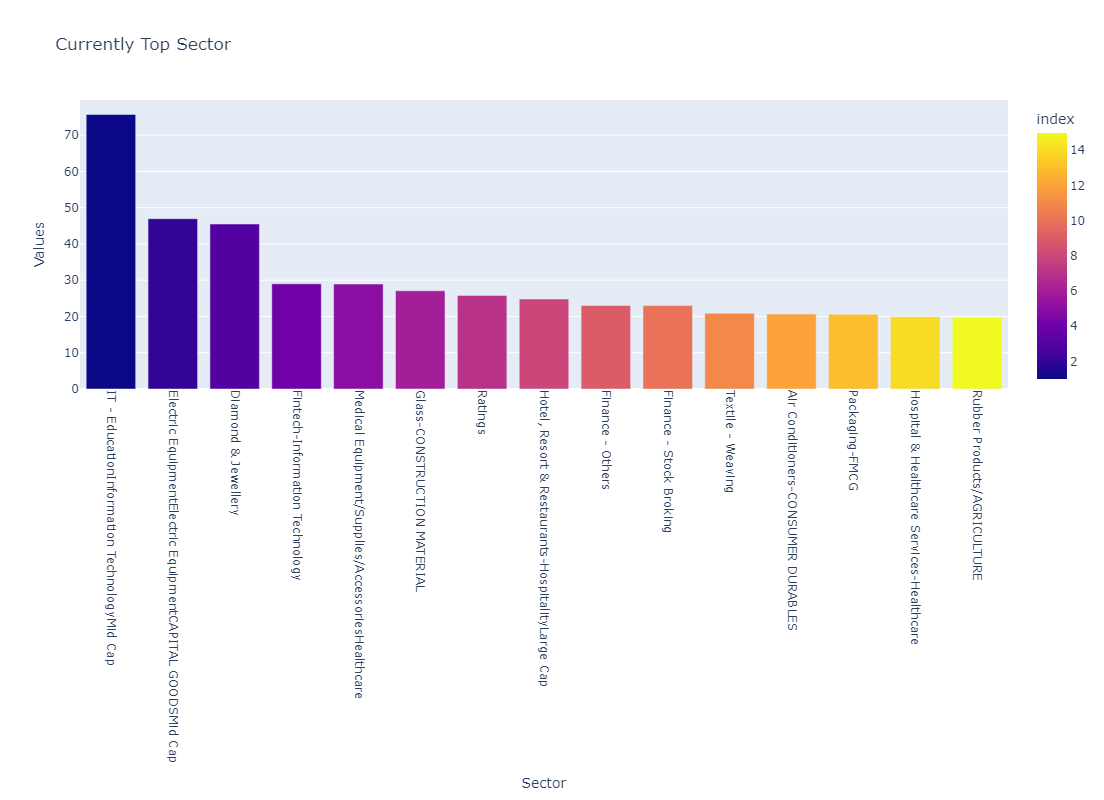

In [39]:
fig = px.bar(data_frame=top_live,
      x=top_live['Sector'],
      y=top_live['Live'],
      color=top_live.index,
      title='Currently Top Sector',
      width=1200,
      height=800
            )
fig.update_layout(
    xaxis_title='Sector',
    yaxis_title='Values',
    xaxis_tickangle=90
)


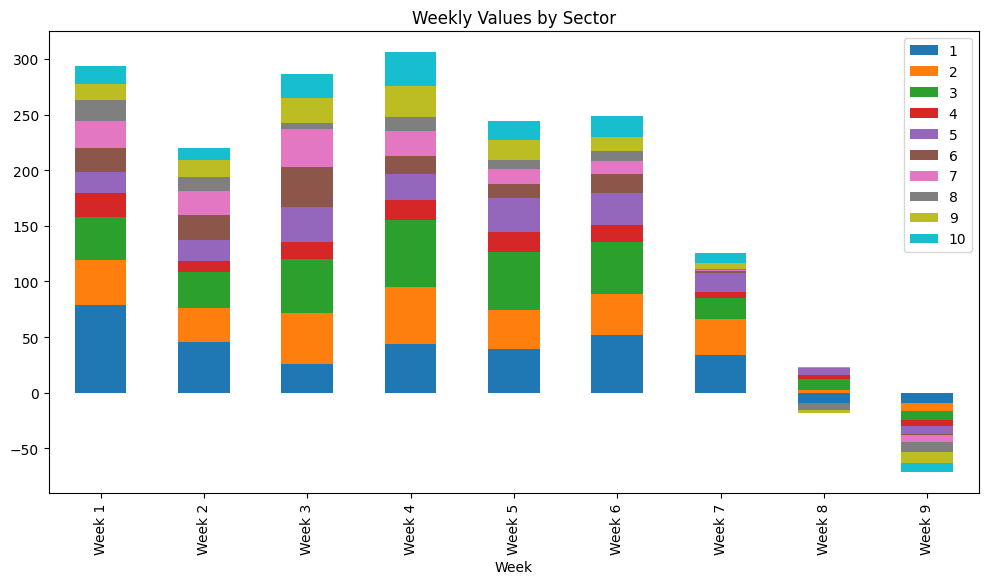

In [40]:
weekly_cols = ['Week 1', 'Week 2','Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']
import matplotlib.pyplot as plt
top_live[weekly_cols].head(10).T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Weekly Values by Sector')
plt.xlabel('Week')
plt.show()

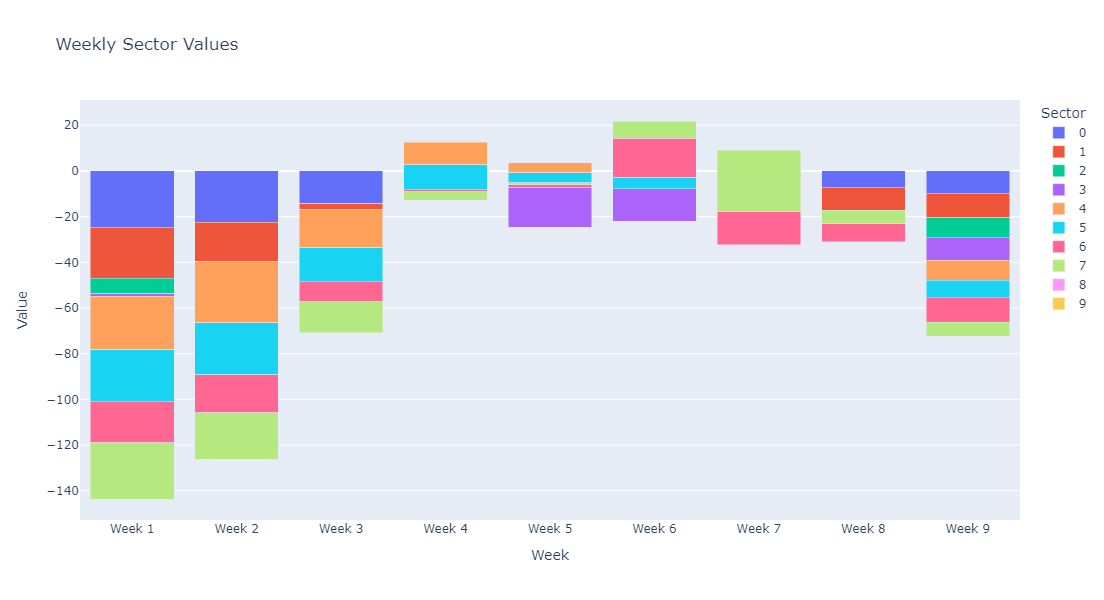

In [41]:
df_melted = top_live[weekly_cols].head(10).T.reset_index()
weekly_cols = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']


sector_names = rank_df.index[:10]  
df_for_plot = rank_df.loc[sector_names, weekly_cols]


df_for_plot_reset = df_for_plot.reset_index()

df_for_plot_reset.columns = ['Sector'] + weekly_cols

df_for_plot_reset['Sector'] = df_for_plot_reset['Sector'].astype(str)

df_melted = df_for_plot_reset.melt(id_vars=['Sector'], value_vars=weekly_cols, 
                                   var_name='Week', value_name='Value')

fig = px.bar(df_melted, 
             x='Week', 
             y='Value', 
             color='Sector', 
             title='Weekly Sector Values', 
             labels={'Value': 'Value', 'Week': 'Week'}, 
             height=600, 
             barmode='stack')

fig.show()

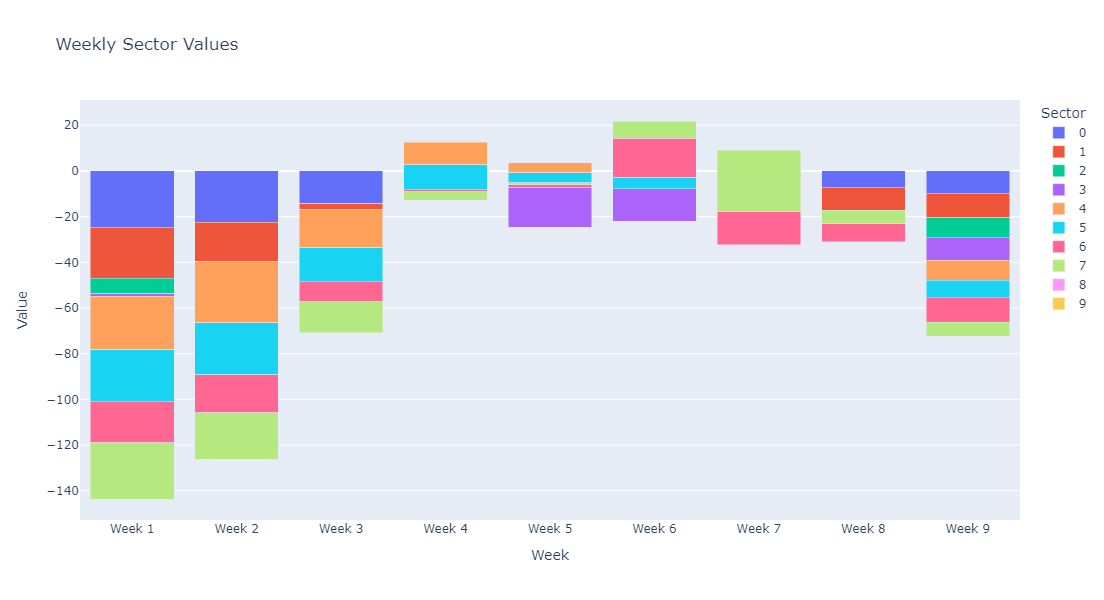

In [42]:
fig = px.bar(df_melted, 
             x='Week', 
             y='Value', 
             color='Sector', 
             title='Weekly Sector Values', 
             labels={'Value': 'Value', 'Week': 'Week'}, 
             height=600, 
             barmode='stack')

# Show the plot
fig.show()

In [43]:
rank_columns = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']

for col in rank_columns:
    top_live[col] = top_live[col].rank(method='dense',ascending=False).astype(int)


In [44]:
top_live['Live'] = top_live['Live'].rank(method='dense',ascending=False).astype(int)

In [45]:
top_live

,Sector,Live,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
1,IT - EducationInformation TechnologyMid Cap,1,1,1,6,3,2,1,1,15,13
2,Electric EquipmentElectric EquipmentCAPITAL GO...,2,2,3,2,2,3,3,2,4,6
3,Diamond & Jewellery,3,3,2,1,1,1,2,3,1,9
4,Fintech-Information Technology,4,6,11,10,10,8,8,8,3,2
5,Medical Equipment/Supplies/AccessoriesHealthcare,5,7,7,5,7,4,4,4,2,4
6,Glass-CONSTRUCTION MATERIAL,6,5,4,3,11,11,7,11,8,1
7,Ratings,7,4,5,4,8,9,11,12,6,3
8,"Hotel, Resort & Restaurants-HospitalityLarge Cap",8,8,9,13,13,13,13,13,14,10
9,Finance - Others,9,13,8,7,6,6,10,9,11,15
10,Finance - Stock Broking,10,10,10,9,5,7,5,5,9,8


In [46]:
rank_columns_col = ['Live','Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9']
styled_df = top_live.style
for cols in rank_columns_col:
    styled_df = styled_df.background_gradient(cmap='RdYlGn_r',subset=[cols])

In [47]:
styled_df

,Sector,Live,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
1,IT - EducationInformation TechnologyMid Cap,1,1,1,6,3,2,1,1,15,13
2,Electric EquipmentElectric EquipmentCAPITAL GOODSMid Cap,2,2,3,2,2,3,3,2,4,6
3,Diamond & Jewellery,3,3,2,1,1,1,2,3,1,9
4,Fintech-Information Technology,4,6,11,10,10,8,8,8,3,2
5,Medical Equipment/Supplies/AccessoriesHealthcare,5,7,7,5,7,4,4,4,2,4
6,Glass-CONSTRUCTION MATERIAL,6,5,4,3,11,11,7,11,8,1
7,Ratings,7,4,5,4,8,9,11,12,6,3
8,"Hotel, Resort & Restaurants-HospitalityLarge Cap",8,8,9,13,13,13,13,13,14,10
9,Finance - Others,9,13,8,7,6,6,10,9,11,15
10,Finance - Stock Broking,10,10,10,9,5,7,5,5,9,8
